In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd /content/gdrive/MyDrive/Colab Notebooks/01 - Machine Learning/

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/01 - Machine Learning


In [ ]:
pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix,  classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# set default style
from matplotlib import rcParams
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10,4)})
rcParams['figure.figsize'] = 10,4

# Sklearn Classifier

## Logistic regression

https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2

In [ ]:
# define x and y
dataset = pd.read_csv('./data/Social_Network_Ads.csv')
x = dataset.iloc[:, [2,3]]
y = dataset.iloc[:, 4]

# splitting
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predictions
y_pred = classifier.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [ ]:
# to get probability of the dataset 
classifier.predict_proba(X_test)[:, 1].shape

(100,)

## K Nearest Neighbours
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://towardsdatascience.com/how-to-build-knn-from-scratch-in-python-5e22b8920bd2

https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940

In [ ]:
df = pd.read_csv("./data/Classified Data",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
# scale and transform
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.30)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
print(pd.DataFrame(cm, columns = ['Predicted -', 'Predicted +'], index = ['Actual -', 'Actual +']))
print(classification_report(y_test,pred))

          Predicted -  Predicted +
Actual -           65            3
Actual +            8           24
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       161
           1       0.87      0.93      0.90       139

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



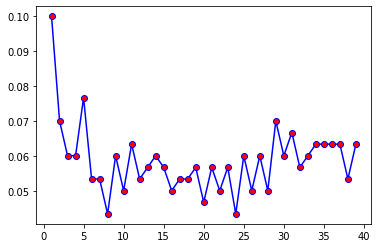

In [ ]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1, 40),error_rate,color='blue', marker='o', markerfacecolor='red')

## Support Vector Machine

Despite of good theoretic foundations and high classification accuracy of support vector machines (SVM), normal SVM is not suitable for classification of large data sets, because the training complexity of SVM is very high.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://www.python-engineer.com/courses/mlfromscratch/07_svm/

https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496

https://dzone.com/articles/using-jsonb-in-postgresql-how-to-effectively-store-1

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)
model = SVC(C=1, gamma=0.001, kernel='rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, columns = ['Predicted -', 'Predicted +'], index = ['Actual -', 'Actual +']))
print(classification_report(y_test,y_pred))

          Predicted -  Predicted +
Actual -           59            7
Actual +            5          100
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        66
           1       0.93      0.95      0.94       105

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



## Naive Bayes

https://towardsdatascience.com/how-i-was-using-naive-bayes-incorrectly-till-now-part-1-4ed2a7e2212b

https://towardsdatascience.com/whats-so-naive-about-naive-bayes-58166a6a9eba

https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece


https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes

In [ ]:
# Data Import
dataset = pd.read_csv('./data/Social_Network_Ads.csv')
x = dataset.iloc[:, [2,3]]
y = dataset.iloc[:, 4]

# split testing and training set
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=0)

# feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
print(pd.DataFrame(cm, columns = ['Predicted -', 'Predicted +'], index = ['Actual -', 'Actual +']))
print(classification_report(Y_test,y_pred))

          Predicted -  Predicted +
Actual -           65            3
Actual +            7           25
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



## Random Forest

Random Forest is a bagging algorithm. It reduces variance.
Say that you have very unreliable models, such as Decision Trees. (Why unreliable? Because if you change your data a little bit, the decision tree created can be very different.) In such a case, you can build a robust model (reduce variance) through bagging -- bagging is when you create different models by resampling your data to make the resulting model more robust. The randomness come from random  sample (can be repeated) and selections from M features

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

https://machinelearningmastery.com/implement-random-forest-scratch-python/

https://machinelearningmastery.com/information-gain-and-mutual-information/

In [ ]:
df = pd.read_csv('./data/kyphosis.csv')
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
cm = confusion_matrix(y_test, predictions)
print(pd.DataFrame(cm, columns = ['Predicted -', 'Predicted +'], index = ['Actual -', 'Actual +']))
print(classification_report(y_test,predictions))

          Predicted -  Predicted +
Actual -           19            3
Actual +            3            0
              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        22
     present       0.00      0.00      0.00         3

    accuracy                           0.76        25
   macro avg       0.43      0.43      0.43        25
weighted avg       0.76      0.76      0.76        25



In [ ]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, rfc_pred)
print(pd.DataFrame(cm, columns = ['Predicted -', 'Predicted +'], index = ['Actual -', 'Actual +']))
print(classification_report(y_test,rfc_pred))

          Predicted -  Predicted +
Actual -           19            3
Actual +            3            0
              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        22
     present       0.00      0.00      0.00         3

    accuracy                           0.76        25
   macro avg       0.43      0.43      0.43        25
weighted avg       0.76      0.76      0.76        25



# Boosting

In [ ]:
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

## AdaBoost

Apply Stump (decision tree with depth 1). Putting heavier weight for misclassified observations. Apply weight for different tree based on Error rate

https://www.youtube.com/watch?v=LsK-xG1cLYA

https://medium.com/analytics-vidhya/implementing-an-adaboost-classifier-from-scratch-e30ef86e9f1b

https://scikit-learn.org/stable/modules/ensemble.html#adaboost

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [ ]:
dataset = pd.read_csv('./data/Churn_Modelling.csv').iloc[:, 3:]
df_dummies = pd.get_dummies(dataset['Geography'], prefix = 'Geography')
dataset = pd.concat([dataset.drop(columns = 'Geography'), df_dummies], axis=1)
dataset['Gender'] = LabelEncoder().fit_transform(dataset['Gender'])
dataset.head() 

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
X = dataset.drop(columns = ['Exited', 'Geography_Spain'])
y = dataset['Exited']

# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ada_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1,
    algorithm="SAMME")
ada_discrete.fit(X_train, y_train)
print("Discret Adaboost Performance:", ada_discrete.score(X_test, y_test))

ada_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1,
    algorithm="SAMME.R")
ada_real.fit(X_train, y_train)
print("Real Adaboost Performance:", ada_real.score(X_test, y_test))

Discret Adaboost Performance: 0.862
Real Adaboost Performance: 0.8635


## Gradient Boosting

https://www.mygreatlearning.com/blog/gradient-boosting/

https://www.youtube.com/watch?v=3CC4N4z3GJc

https://ericwebsmith.github.io/2020/04/19/GradientBoostingClassification/

https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db

In [ ]:
dataset = pd.read_csv('./data/Churn_Modelling.csv').iloc[:, 3:]
df_dummies = pd.get_dummies(dataset['Geography'], prefix = 'Geography')
dataset = pd.concat([dataset.drop(columns = 'Geography'), df_dummies], axis=1)
dataset['Gender'] = LabelEncoder().fit_transform(dataset['Gender'])

X = dataset.drop(columns = ['Exited', 'Geography_Spain'])
y = dataset['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
gbm = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1)

gbm.fit(X_train, y_train)
print("GBM Performance:", gbm.score(X_test, y_test))

GBM Performance: 0.8665


## XGBoost

Expansion on GBM, but it added the regularization parameters with alpha, gamma, lambda 


https://medium.com/analytics-vidhya/what-makes-xgboost-so-extreme-e1544a4433bb

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://www.youtube.com/watch?v=OtD8wVaFm6E

In [ ]:
def auc(m, X_train, X_test, y_train, y_test):
    return (metrics.roc_auc_score(y_train,m.predict_proba(X_train)[:,1]),
            metrics.roc_auc_score(y_test,m.predict_proba(X_test)[:,1]))

In [ ]:
dataset = pd.read_csv('./data/Churn_Modelling.csv').iloc[:, 3:]
df_dummies = pd.get_dummies(dataset['Geography'], prefix = 'Geography')
dataset = pd.concat([dataset.drop(columns = 'Geography'), df_dummies], axis=1)
dataset['Gender'] = LabelEncoder().fit_transform(dataset['Gender'])
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
X = dataset.drop(columns = ['Exited', 'Geography_Spain'])
y = dataset['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Parameter Tuning
model = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv=2, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  1.4min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
classifier = xgb.XGBClassifier(max_depth=10, min_child_weight=6,  n_estimators=200,
                          n_jobs=-1 , verbose=1,learning_rate=0.05)
classifier.fit(X_train,y_train)
auc(classifier, X_train, X_test, y_train, y_test)

(0.9757888708247118, 0.8693540771701691)

In [ ]:
# prediction and evaluation
y_pred = classifier.predict_proba(X_test)[:, 1]
y_pred = (y_pred > 0.5) * 1

cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, columns = ['Predicted -', 'Predicted +'], index = ['Actual -', 'Actual +']))
print(classification_report(y_test,y_pred))

          Predicted -  Predicted +
Actual -         1505           90
Actual +          197          208
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.70      0.51      0.59       405

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## CatBoost

Huge Impact with/without categorical features

In [ ]:
def auc(m, X_train, X_test, y_train, y_test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(X_train)[:,1]),
            metrics.roc_auc_score(y_test,m.predict_proba(X_test)[:,1]))

In [ ]:
data = pd.read_csv("./data/flights.csv")
data = data[["MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT","AIR_TIME", "DEPARTURE_TIME","DISTANCE","ARRIVAL_DELAY"]]
data.dropna(inplace=True)
data["ARRIVAL_DELAY"] = (data["ARRIVAL_DELAY"]>10)*1
cols = ["AIRLINE", "FLIGHT_NUMBER", "DESTINATION_AIRPORT", "ORIGIN_AIRPORT"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1
data.sample(5)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIR_TIME,DEPARTURE_TIME,DISTANCE,ARRIVAL_DELAY
14506,6,13,6,1,1467,369,388,123.0,1533.0,936,0
355186,10,12,1,4,2116,203,169,147.0,830.0,1020,0
453980,2,14,6,10,6455,375,478,109.0,2023.0,833,0
408709,1,20,2,8,3211,396,530,51.0,755.0,235,0
70467,2,28,6,7,364,444,525,23.0,1411.0,100,1


In [ ]:
X = data.drop(["ARRIVAL_DELAY"], axis=1)
y = data["ARRIVAL_DELAY"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [ ]:
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [10]}
cb_classifier = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb_classifier, params, scoring="roc_auc", cv=3)
cb_model.fit(X_train, y_train)

In [ ]:
# without categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations=10, 
                            l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(X_train,y_train)
auc(clf, X_train, X_test, y_train, y_test)

0:	total: 148ms	remaining: 1.33s
1:	total: 298ms	remaining: 1.19s
2:	total: 457ms	remaining: 1.07s
3:	total: 618ms	remaining: 927ms
4:	total: 793ms	remaining: 793ms
5:	total: 946ms	remaining: 631ms
6:	total: 1.1s	remaining: 473ms
7:	total: 1.26s	remaining: 314ms
8:	total: 1.42s	remaining: 158ms
9:	total: 1.57s	remaining: 0us


(0.6783017974197476, 0.6733909015732816)

In [ ]:
# with categorical features
# cat_features denotes the index of categorical features
# ome hot max size, use one hot encoding for all features with number of less than given values
cat_features_index = [0,1,2,3,4,5,6]
clf = cb.CatBoostClassifier(eval_metric="AUC", one_hot_max_size=31, depth=10, iterations=30, 
                            l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(X_train, y_train, cat_features= cat_features_index)
auc(clf, X_train, X_test, y_train, y_test)

0:	total: 268ms	remaining: 7.77s
1:	total: 492ms	remaining: 6.89s
2:	total: 725ms	remaining: 6.53s
3:	total: 968ms	remaining: 6.29s
4:	total: 1.21s	remaining: 6.07s
5:	total: 1.47s	remaining: 5.88s
6:	total: 1.7s	remaining: 5.57s
7:	total: 1.93s	remaining: 5.3s
8:	total: 2.16s	remaining: 5.05s
9:	total: 2.4s	remaining: 4.81s
10:	total: 2.63s	remaining: 4.54s
11:	total: 2.85s	remaining: 4.28s
12:	total: 3.08s	remaining: 4.03s
13:	total: 3.32s	remaining: 3.79s
14:	total: 3.54s	remaining: 3.54s
15:	total: 3.77s	remaining: 3.3s
16:	total: 4.01s	remaining: 3.06s
17:	total: 4.24s	remaining: 2.82s
18:	total: 4.47s	remaining: 2.59s
19:	total: 4.68s	remaining: 2.34s
20:	total: 4.91s	remaining: 2.1s
21:	total: 5.15s	remaining: 1.87s
22:	total: 5.4s	remaining: 1.64s
23:	total: 5.63s	remaining: 1.41s
24:	total: 5.87s	remaining: 1.17s
25:	total: 6.09s	remaining: 938ms
26:	total: 6.32s	remaining: 703ms
27:	total: 6.56s	remaining: 469ms
28:	total: 6.79s	remaining: 234ms
29:	total: 7.02s	remaining: 0u

(0.5194705119972811, 0.5180804709604108)

In [ ]:
# prediction and evaluation
y_pred = clf.predict_proba(X_test)[:, 1]
y_pred = (y_pred > 0.4) * 1

cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, columns = ['Predicted -', 'Predicted +'], index = ['Actual -', 'Actual +']))
print(classification_report(y_test,y_pred))

          Predicted -  Predicted +
Actual -       109361         2275
Actual +        27716         3483
              precision    recall  f1-score   support

           0       0.80      0.98      0.88    111636
           1       0.60      0.11      0.19     31199

    accuracy                           0.79    142835
   macro avg       0.70      0.55      0.53    142835
weighted avg       0.76      0.79      0.73    142835



## Light GBM

https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

https://neptune.ai/blog/lightgbm-parameters-guide

In [ ]:
def auc(m, X_train, X_test, y_train, y_test): 
    return (metrics.roc_auc_score(y_train,m.predict(X_train)),
            metrics.roc_auc_score(y_test,m.predict(X_test)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [ ]:
lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv=3, scoring="roc_auc", verbose=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 28.0min finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=50,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=1200, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# change to lgb data format
d_train = lgb.Dataset(X_train, label=y_train)
params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

In [ ]:
# Without Categorical Features
clf_lgb = lgb.train(params, d_train)
auc(clf_lgb, X_train, X_test, y_train, y_test)

(0.9819478390606773, 0.7862195379616135)

In [ ]:
# With Catgeorical Features
# cat_features_name = ["MONTH","DAY","DAY_OF_WEEK","AIRLINE",
#                       "DESTINATION_AIRPORT", "ORIGIN_AIRPORT"]

# d_train = lgb.Dataset(X_train, label=y_train, free_raw_data=False )
# params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

# clf_lgb = lgb.train(params, d_train, categorical_feature=cat_features_name)
# auc(clf_lgb, X_train, X_test, y_train, y_test)

In [ ]:
# prediction and evaluation
# predictions = clf_lgb.predict(X_test)
y_pred = (predictions > 0.35) * 1
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, columns = ['Predicted -', 'Predicted +'], index = ['Actual -', 'Actual +']))
print(classification_report(y_test,y_pred))